In [1]:
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Assignment 2

In [2]:
dataB = pd.read_csv('Datasett Termpaper.csv', parse_dates=True, delimiter=';')
dataO = pd.read_csv('OSEBX.OL.csv', parse_dates=True, delimiter=';')

In [3]:
dataB['Returns'] = dataB['Returns'].replace(',', '.', regex=True).astype(float)
dataO['Returns'] = dataO['Returns'].replace(',', '.', regex=True).astype(float)

dataB['Open'] = dataB['Open'].replace(',', '.', regex=True).astype(float)
dataO['Open'] = dataO['Open'].replace(',', '.', regex=True).astype(float)

dataB_cleaned = dataB
dataO_cleaned = dataO

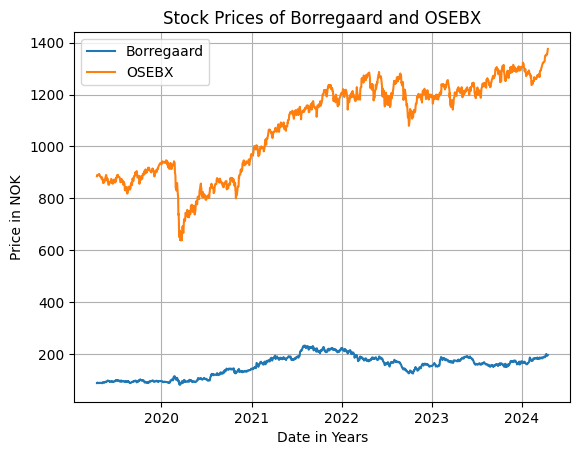

In [4]:
dataB['Date'] = pd.to_datetime(dataB['Date'], dayfirst=True)
dataO['Date'] = pd.to_datetime(dataO['Date'], dayfirst=True)

plt.plot(dataB['Date'], dataB['Open'], label='Borregaard')
plt.plot(dataO['Date'], dataO['Open'], label='OSEBX')
plt.xlabel('Date in Years')
plt.ylabel('Price in NOK')
plt.title('Stock Prices of Borregaard and OSEBX')
plt.legend()
plt.grid()
plt.savefig("ImagesTermpaper/Stockprices.png")
plt.show()

In [5]:
# Calculate annualized simple return by averaging daily returns and multiplying by 252 (trading days in a year)
annualized_return_Borregaard = dataB_cleaned['Returns'].mean() * 252
annualized_return_OSEBX = dataO_cleaned['Returns'].mean() * 252

# Calculate yearly volatility as the standard deviation of daily returns, annualized
yearly_volatility_Borregaard = dataB_cleaned['Returns'].std() * np.sqrt(252)
yearly_volatility_OSEBX = dataO_cleaned['Returns'].std() * np.sqrt(252)

# Assignment 3: Calculate Beta for EPR 
# Beta is calculated as the covariance of Borregaards's returns with OSEBX's returns divided by the variance of OSEBX's returns
covariance = np.cov(dataB_cleaned['Returns'], dataO_cleaned['Returns'])[0][1]
variance_OSEBX = np.var(dataO_cleaned['Returns'])
beta_Borregaard = covariance / variance_OSEBX

In [6]:
print(f"AR Borregard {annualized_return_Borregaard:.2f}")
print(f"AR OSEBX {annualized_return_OSEBX:.2f}")
print(f"YV Borregard {yearly_volatility_Borregaard:.2f}")
print(f"YV OSEBX {yearly_volatility_OSEBX:.2f}")
print(f"Beta Borregard {beta_Borregaard:.2f}")


AR Borregard -0.89
AR OSEBX 8.19
YV Borregard 29.72
YV OSEBX 18.00
Beta Borregard 0.45


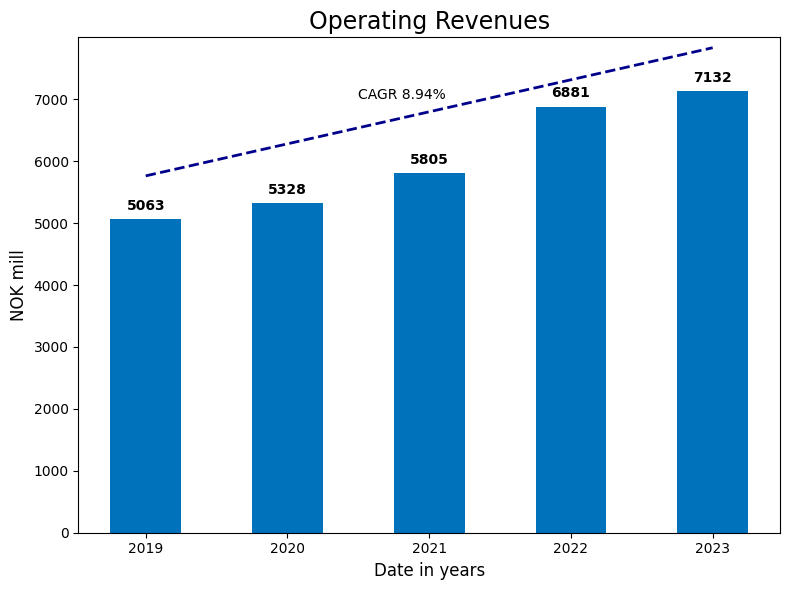

In [7]:

# Data
years = [2019, 2020, 2021, 2022, 2023]
revenues = [5063, 5328, 5805, 6881, 7132]
cagr = (((7132/5063)**(1/4))-1)*100

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot
bars = ax.bar(years, revenues, color="#0072BC", width=0.5)

# Add revenue values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 100, f'{yval}', ha='center', va='bottom', fontweight='bold')

# Add CAGR line
x_pos = [years[0], years[-1]]
y_pos = [revenues[0] + 700, revenues[-1] + 700]
ax.plot(x_pos, y_pos, color="darkblue", linewidth=2, linestyle='--')
ax.text(2020.5, 7000, f"CAGR {cagr:.2f}%")

# Axis labels and title
ax.set_title("Operating Revenues",fontsize = 17, loc='center')
ax.set_ylabel("NOK mill", fontsize = 12)
ax.set_xlabel("Date in years", fontsize = 12)
ax.set_yticks(range(0, 8000, 1000))
ax.set_ylim(0, 8000)

# Style
plt.grid(False)
plt.xticks(years)
plt.yticks()
plt.tight_layout()

# Save the image
plt.savefig('ImagesTermpaper/Operatingrevenues.png')

# Display plot
plt.show()


Cagr:15.32


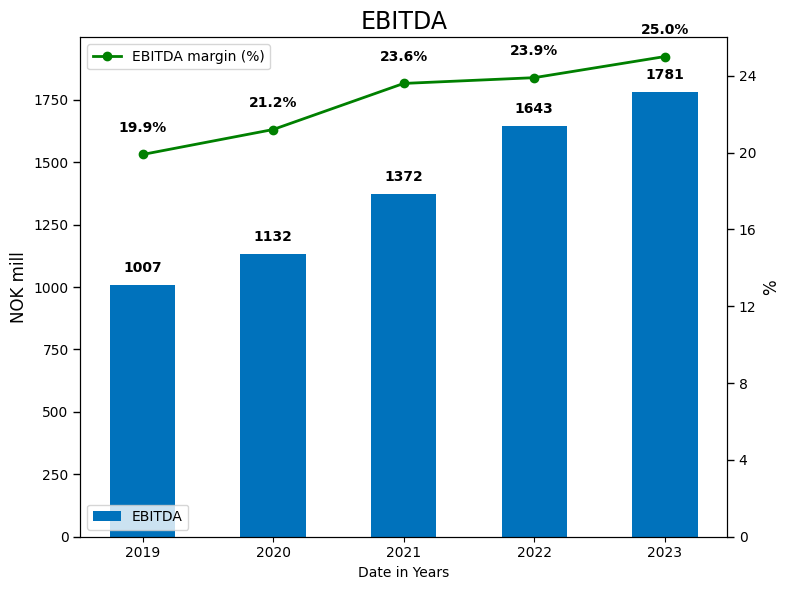

In [8]:
import matplotlib.pyplot as plt

# Data for new chart (EBITDA)
years_ebitda = [2019, 2020, 2021, 2022, 2023]
ebitda = [1007, 1132, 1372, 1643, 1781]
ebitda_margin = [19.9, 21.2, 23.6, 23.9, 25.0]
cagr = (((1781/1007)**(1/4))-1)*100
print(f"Cagr:{cagr:.2f}")
# Plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for EBITDA
bars = ax1.bar(years_ebitda, ebitda, color="#0072BC", width=0.5, label='EBITDA')

# Line plot for EBITDA margin
ax2 = ax1.twinx()
ax2.plot(years_ebitda, ebitda_margin, color='green', marker='o', linewidth=2, label='EBITDA margin (%)')

# Add EBITDA values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 40, f'{yval}', ha='center', va='bottom', fontweight='bold')

# Add EBITDA margin values above line markers
for i, margin in enumerate(ebitda_margin):
    ax2.text(years_ebitda[i], margin + 1, f'{margin}%', ha='center', va='bottom', fontweight='bold')

# Axis labels and title
ax1.set_title("EBITDA", fontsize = 17, loc='center')
ax1.set_ylabel("NOK mill", fontsize = 12)
ax2.set_ylabel("%", fontsize = 12)
ax1.set_xlabel("Date in Years")

# Set y-axis limits and ticks
ax1.set_ylim(0, 2000)
ax2.set_ylim(0, 26)
ax1.set_yticks(range(0, 2000, 250))
ax2.set_yticks(range(0, 26, 4))

# Legend
ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

# Style
plt.grid(False)
plt.xticks(years_ebitda, fontweight='bold')
ax1.yaxis.set_tick_params(width=1, length=5)
ax2.yaxis.set_tick_params(width=1, length=5)

plt.tight_layout()

# Save the image
plt.savefig('ImagesTermpaper/EBITA.png')

# Display plot
plt.show()


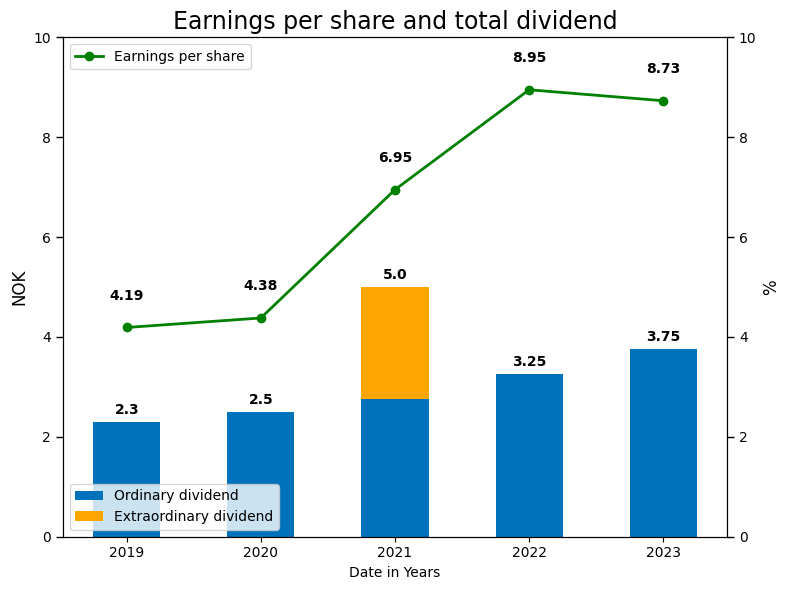

In [9]:
import matplotlib.pyplot as plt

# Data for Earnings Per Share and Dividends
years_eps = [2019, 2020, 2021, 2022, 2023]
ordinary_dividend = [2.3, 2.5, 2.75, 3.25, 3.75]
extraordinary_dividend = [0, 0, 2.25, 0, 0]
eps = [4.19, 4.38, 6.95, 8.95, 8.73]

# Plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for dividends
bars1 = ax1.bar(years_eps, ordinary_dividend, color="#0072BC", width=0.5, label='Ordinary dividend')
bars2 = ax1.bar(years_eps, extraordinary_dividend, bottom=ordinary_dividend, color="#FFA500", width=0.5, label='Extraordinary dividend')

# Line plot for Earnings Per Share
ax2 = ax1.twinx()
ax2.plot(years_eps, eps, color='green', marker='o', linewidth=2, label='Earnings per share')

# Add dividend values on top of each bar
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()
    total_dividend = yval1 + yval2
    ax1.text(bar1.get_x() + bar1.get_width() / 2, total_dividend + 0.1, f'{total_dividend}', ha='center', va='bottom', fontweight='bold')

# Add EPS values above line markers
for i, value in enumerate(eps):
    ax2.text(years_eps[i], value + 0.5, f'{value}', ha='center', va='bottom', fontweight='bold')

# Axis labels and title
ax1.set_title("Earnings per share and total dividend", fontsize = 17, loc='center')
ax1.set_ylabel("NOK", fontsize = 12)
ax2.set_ylabel("%", fontsize = 12)
ax1.set_xlabel("Date in Years")

# Set y-axis limits and ticks
ax1.set_ylim(0, 10)
ax2.set_ylim(0, 10)
ax1.set_yticks(range(0, 11, 2))
ax2.set_yticks(range(0, 11, 2))

# Legend
ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

# Style
plt.grid(False)
plt.xticks(years_eps, fontsize=12, fontweight='bold')
ax1.yaxis.set_tick_params(width=1, length=5)
ax2.yaxis.set_tick_params(width=1, length=5)

plt.tight_layout()

# Save the image
plt.savefig('ImagesTermpaper/EarningsandDividends.png')

# Display plot
plt.show()


## Assignment 3

In [10]:
# Assignment 3: Caluclate WACC

E = np.array([4.894,4.445,4.306]) #From the annual reports
D = np.array([2.262,2.072,1.544]) #From the annual reports
Beta = beta_Borregaard
Rm = 0.08 
Rf = 0.03 
Re = Rf + Beta * (Rm - Rf)
Rd = 0.03756 # 10 year government bond yield
Tc = 0.22


WACC = (E/(E+D)) * Re + (D/(E+D)) * Rd * (1 - Tc)
print(f"WACC= 2023:{WACC[0]*100:.2f}%, 2022:{WACC[1]*100:.2f}% og 2021:{WACC[2]*100:.2f}%")

WACC= 2023:4.50%, 2022:4.50% og 2021:4.62%


## Assignment 4

The average volume is calculated from the dataset at 83 217 shares per day. With a total of 99 753 000 shares at the end of 2023, 0.08% of the shares are traded each day. This does not indicate very high liquidity, but neither does it indicate poor liquidity. At a snapshot on 05.03.2024 at 09:28, there are 8 443 buy orders and 16 058 sell orders. Thus, the total order depth is 24 501 orders. The spread is 191.6-191 = 0.6 (0.6/191.6 = 0.0031 = 0.31%). This is a low spread, which indicates good liquidity.

This can be compared to DNB at the same time, which has 33 666 buy orders and 34 753 sell orders. Thus, the order depth is 68 419 orders. The spread is 195.45-195.4 = 0.05 (0.05/195.45 = 0.00025 = 0.025%). This is a very low spread, and indicates good liquidity. It is 12 times more liquid than Borregaard when just considering the spread.

Based on the volume and spread, the unsystematic risk of Borregaard is fair (Financial risk). Based on earlier analysis of their market position and products show an advantage for future salges (Strategic and Business risk). Because Borregaard have such a long history with production and sales, the risk of supply chains breaking down is low (Operational risk). The Legal and Regulatory risks are low based on the argument that biological materials must substitute inorganic materials if a carbon neutral economy is to be reached. Overall the unsystematic risk of Borregaard is low to fair, where the liquidity as of the stocks is seen as the relative biggest risk.

In [11]:
Volumeavg = np.average(dataB['Volume'])
print(f'{Volumeavg:.0f}')

83217


## Assignment 5

The dept/equity ratio is over 1 for Borregaard. It is likely that other companies within the same industry segment have similar figures. The reason is that the total value of the company increases with debt in a world with taxes. According to the Modigliani-Miller propositions the debt works as a tax shield, such that more of the value goes to shareholders and creditors. The formula showing this is: VL = VU + tcD. However, Modigliani-Miller also proposes that the cost of equity rises with leverage because the risk to equity increases. This means that a balance between equity and debt are important. Borregaard, and most likely other companies as well does this by keeping the dept/equity ratio at a level where the cost of equity is not increasing past the benefit of the taxshield. This should be close to 1 as is the case with Borregaard. 

In [12]:
EBIT = np.array([1295000,1206000,935000])
InterestExpense = np.array([171000,88000,62000])
Debt = np.array([1791000,1836000,1417000]) #Net interest bearing debt
Interestrate = (InterestExpense/Debt)*100
print(f'The average cost of debt for the last 3 years is: {Interestrate}%')

Pretaxincome = np.array([1124000,1118000,873000])
TaxProvision = np.array([268000,267000,213000])
Taxrate = (TaxProvision/Pretaxincome)*100
print(f'The average taxrate for Borregaard the last 3 years is: {Taxrate.mean():.2f}%')

Ra = 10 #Assumed cost of equity for an all equity firm in %
Re = Ra + (D/E)*(100-Taxrate)*(Ra-Interestrate)
print(f'The cost of equity for Borregaard is: {Re}%')

The average cost of debt for the last 3 years is: [9.54773869 4.79302832 4.37544107]%
The average taxrate for Borregaard the last 3 years is: 24.04%
The cost of equity for Borregaard is: [ 25.919357   194.75276967 162.4724692 ]%


These results show that the cost of equity far surpasses the cost of dept, which argues for having a hight debt/equity ratio. 

## Assignment 6

In [13]:
#Market Value measures

NrShares = 100000000 #Nr of shares 31.12.2023 from Annual report
BookValue = 4894000000
MarketCapitalization = 17065000000
BVpershare = BookValue/NrShares 
MCpershare = MarketCapitalization/NrShares

print(f'The Book Value per share is: {BVpershare:.2f} NOK')
print(f'The Market Capitalization per share is: {MCpershare:.2f} NOK')

The Book Value per share is: 48.94 NOK
The Market Capitalization per share is: 170.65 NOK


According to the annual reports back to 2019 it can be found that "It is Borregaard’s policy that shareholder value shall not 
be diluted by the issuance of new shares". No new shares has been issued the last 5 years. When it comes to the net interest-bearing debt, which is used to calculate the leverage ratio with EBITA, it has evolved as follows in million NOK: 2019: 1 876 , 2020: 1 794, 2021: 1 417, 2022: 1 836 and 2023: 1 791. This showes that the dept has been paid down from 2019 to 2021, but then issued new dept in 2022 and 2023. This is a good sign, as it shows that the company is able to pay down dept when needed. 



In [14]:
#The Altman's Z-score model for private companies 

NetWorkingCapital = 1313000000
TotalAssets = 9115000000
Accumulatedretainedearnings = 2583000000
Marketvalueofequity = 171.4 *100000000
Bookvalueofdebt = 2262000000
Sales = 7024000000
EBIT = 1295000

Z = 1.2*(NetWorkingCapital/TotalAssets) + 1.4*(Accumulatedretainedearnings/TotalAssets) + 3.3*(EBIT/TotalAssets) + 0.6*(Marketvalueofequity/Bookvalueofdebt) + 1.0*(Sales/TotalAssets)
print(f'Altmans Z-score for Borregaard 2023 is: {Z:.2f}')

Altmans Z-score for Borregaard 2023 is: 5.89


Bankruptcy is predicted if Z ≤ 1.81 and non-bankruptcy if Z ≥ 2.99. Because Borregaard has a Z-score of 5.89, the company is well positioned to avoid bankruptcy.

Other performance measures (3 first are Market Value Measures): <br>
-PriceEarnings Ratio (PE): 23.00 #Found on Yahoo <br>
-Earnings per share (EPS): 8.40 #Found on Yahoo <br>
-Price to Book Value ratio (P/B): 170.65/48.94 = 3.49 #Marketcap per share/Book value of EQUITY per share <br>
-Price to earnings ratio to Growth ratio (PEG): In 2023: 23/3.66 = 6.28 and last 5 years 23/8.9 = 2.58 #(PE ratio /revenue growth in %) <br>
-Dividend Payout Ratio (DPR): 3.75/8.40 = 0.4464 #Dividend per share / EPS <br>
-Dividend Yield: 3.75/170.65 = 0.022 #Dividend per share / Price per share<br>

Explained by: https://www.getsmarteraboutmoney.ca/learning-path/stocks/how-to-monitor-stock-performance/

In [15]:
#Profitability Measures

Netincome = 870000000
Revenues = 7024000000
TotalEquity = 4894000000

Profitmargin = Netincome/Revenues
Returnonassets = Netincome/TotalAssets 
Returnonequity = Netincome/TotalEquity

print(f'Profit margin is: {Profitmargin:.2f}')
print(f'Return on assets is: {Returnonassets:.2f}')
print(f'Return on equity is: {Returnonequity:.2f}')

Profit margin is: 0.12
Return on assets is: 0.10
Return on equity is: 0.18


## Assignment 7

Borregaards dividend policy the last 5 years are reflected by the boards statement: <br>

"Under the current dividend policy adopted by 
the Board, Borregaard intends to pay regular and 
progressive dividends reflecting the expected longterm earnings and cash flows of the Borregaard 
Group, targeting an annual dividend between 
30% and 50% of the company’s net profit for the 
preceding financial year". <br>

This is has according to the 2023 annual report been withheld in 2022 and 2023. However from 2019 - 2021, the payout ratio of dividends has been over 50%. In 2021 this was due to an extraordinary dividend, but the other years has just been to high relative to the policy. <br>

The Dividend payment dates for Borregaard has been 2021: 15.04, 2022: 08.04 and 2023: 19.04. 

How was the stock price affected? 

The info was found: https://newsweb.oslobors.no/search?category=1101&issuer=11306&fromDate=2021-01-01&toDate=2023-12-31&market=&messageTitle=Borregaard


## Assignment 8

How does the risk and working capital of Borregaard relate to cheap outside financing? <br>
When taking the low risk of the company into consideration and the 1.313 billion NOK in working capital, it should be easy for Borregaard to achieve outside financing. First of all, banks and other financial institutions will be more than willing to lend money to a company with low risk of getting the money back. Because Borregaard have a policy of not issuing more equity, the second way of raising money is through bonds. This opens for other private companies and individuals to invest in Borregaard. The low risk of the company will make it easier to get a good interest rate on the bonds. This is accually what happend in 2023 when Borregaard issued green bonds worth 500 million with maturity date 20.06.2028. The coupon rate is 3 months NIBOR + 1.25% p.a. This means that the bond issuer pays the bond holder an intrest rate that follows the Norwegian Three Month Interbank Rate pluss 1.25% each year. 


## Assignment 9

### Materiality Matrix Visualization

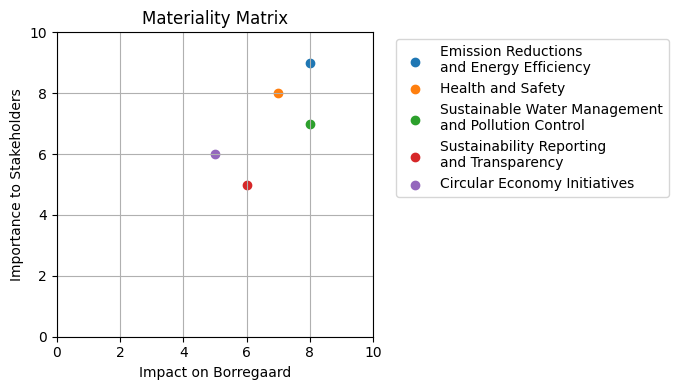

In [16]:

def create_materiality_matrix(width=10, height=8):
    # Define the sustainability issues and their positions in the matrix
    issues = {
        'Emission Reductions\nand Energy Efficiency': (8, 9),
        'Health and Safety': (7, 8),
        'Sustainable Water Management\nand Pollution Control': (8, 7),
        'Sustainability Reporting\nand Transparency': (6, 5),
        'Circular Economy Initiatives': (5, 6)
    }

    # Create the plot with dynamic figure size
    fig, ax = plt.subplots(figsize=(width, height))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_title('Materiality Matrix')
    ax.set_xlabel('Impact on Borregaard')
    ax.set_ylabel('Importance to Stakeholders')

    # Plot each issue
    for issue, coordinates in issues.items():
        ax.scatter(*coordinates, label=issue)

    # Add grid, legend, and enhance layout
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("ImagesTermpaper/Materiality Matrix")
    # Show the plot
    plt.show()

# Example of how to call the function with specific figure size
create_materiality_matrix(7, 4)



## Assignment 10 